In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import keras.backend as K
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import *
from keras.losses import *
from keras.preprocessing.image import ImageDataGenerator
import skimage.io as io
import skimage.transform as tr
import skimage.color
from sklearn.metrics import classification_report
from glob import glob

## Own Scripts
from helper import * 
from loss_metrics import *
from unet import *

Using TensorFlow backend.


In [3]:
# initialise train data
train_size = 18300
val_size = 3922
test_size = 3922
batch_size = 32
dsPath = '/home/dan/Desktop/Datenset_Tower (Augmented)'
epochs = 40

In [ ]:
# load the model
model = load_model('/home/dan/Desktop/FINAL_DATASETS/Datenset_Tower/results/training_05_best.h5', custom_objects={'iou_loss': iou_loss, 'f1': f1, 'iou':iou, 'precision' :precision, 'recall' : recall, 'error' : error})
#model.compile(optimizer=Adam(lr=0.0001), loss=iou_loss, metrics=['accuracy'])

In [12]:
# evaluate on the test dataset
testInputPath = dsPath + '/test/images'
testOutputPath = dsPath + '/test/masks'

testGen = loadData(testInputPath, testOutputPath, batch_size)

In [13]:
model.evaluate_generator(testGen, steps=test_size/batch_size ,verbose=1 )

Found 3922 images belonging to 1 classes.
Found 3922 images belonging to 1 classes.
(32, 224, 224, 1)
(32, 224, 224, 1)
123/122 [==============================] - 17s 137ms/step


[-0.6043294269718849,
 0.7473918913822281,
 0.6043294269718849,
 0.7986441654918268,
 0.7117126440284569,
 0.3099465848747897]

In [3]:
x = None
x = read_imgs('/home/dan/Desktop/Datenset_Tower/test/images/data/*.png', (224,224,1))
y = None
y = read_imgs('/home/dan/Desktop/Datenset_Tower/test/masks/data/*.png', (224,224,1))

/home/dan/.conda/envs/tf-gpu/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/dan/.conda/envs/tf-gpu/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/home/dan/.conda/envs/tf-gpu/lib/python3.6/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800


In [4]:
pred = model.predict(x, verbose=1)

3922/3922 [==============================] - 18s 5ms/step


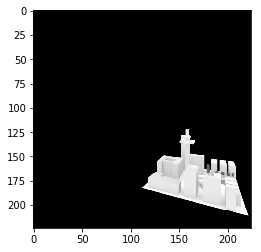

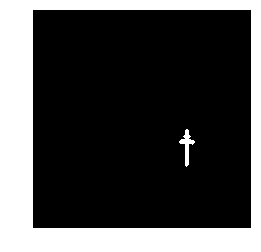

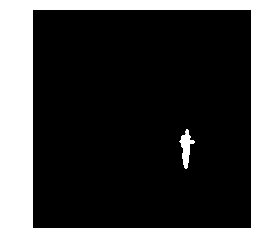

IndexError: index 1 is out of bounds for axis 2 with size 1

In [23]:
import scipy.misc
# Plots the prediction in jupyter notebook for comparison
i = 150

# Input Picture
plt.imshow(x[i, ..., 0], cmap='gray')
plt.show()

# Prediction as RGB
#plt.imshow(pred[i])
#plt.show()

# Ground Truth
plt.imshow(y[i][:,:,0], cmap = 'gray')
plt.axis('off')
plt.show()

# Prediction Dim 0
plt.imshow(pred[i][:,:,0], cmap = 'gray')
plt.axis('off')
plt.show()

# Prediction Dim 1
plt.imshow(pred[i][:,:,1], cmap = 'gray')
plt.show()

# Prediction Dim 2
plt.imshow(pred[i][:,:,2], cmap = 'gray')
plt.show()



In [17]:
model.evaluate(x ,y ,batch_size = 32,verbose=1)

3922/3922 [==============================] - 16s 4ms/step


[-0.4189567444337867, 0.9915314723738963]

In [14]:
print('DSC:       ' + str(f1_np(y, pred)))
print('IoU:       ' + str(iou_np(y, pred)))
print('Precision: ' + str(precision_np(y, pred)))
print('Recall:    ' + str(recall_np(y, pred)))
print('Error:     ' + str(error_np(y, pred)))

DSC:       0.5907045531098558
IoU:       0.41914894983936873
Precision: 0.6400522310434714
Recall:    0.5484217370854018
Error:     0.007871819726275134
